In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import *
import cv2 as cv

In [2]:
import os
import tqdm

In [9]:
train_dir="train"

In [10]:
labels=os.listdir(train_dir)

In [5]:
# we will augment data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# as ModerateDemented class has 52 images we will do data augmentation

In [7]:
#instantiate the ImageDataGenerator class
datagen = ImageDataGenerator(
        vertical_flip=True,
        horizontal_flip=True,
        zoom_range=0.3,
        fill_mode='nearest')


In [13]:
#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('to_augment/',
                                        batch_size=6,
                                        target_size=(176,208),
                                        save_to_dir='augment/',
                                        save_format='jpg'):
    if i==40:
        break
    i+=1
    

Found 52 images belonging to 1 classes.


In [3]:
import tensorflow as tf
from tensorflow import keras

In [7]:
dataset=keras.preprocessing.image_dataset_from_directory(
        'train',
        batch_size=32,
        image_size=(176, 208),
        shuffle=True,
    )

Found 3021 files belonging to 4 classes.


In [13]:
class_names=dataset.class_names

In [14]:
class_names

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

(32, 176, 208, 3) tf.Tensor([1 2 0 1 3 3 1 0 2 2 0 0 0 1 2 1 2 0 3 2 0 0 2 0 2 2 3 2 3 1 0 1], shape=(32,), dtype=int32)


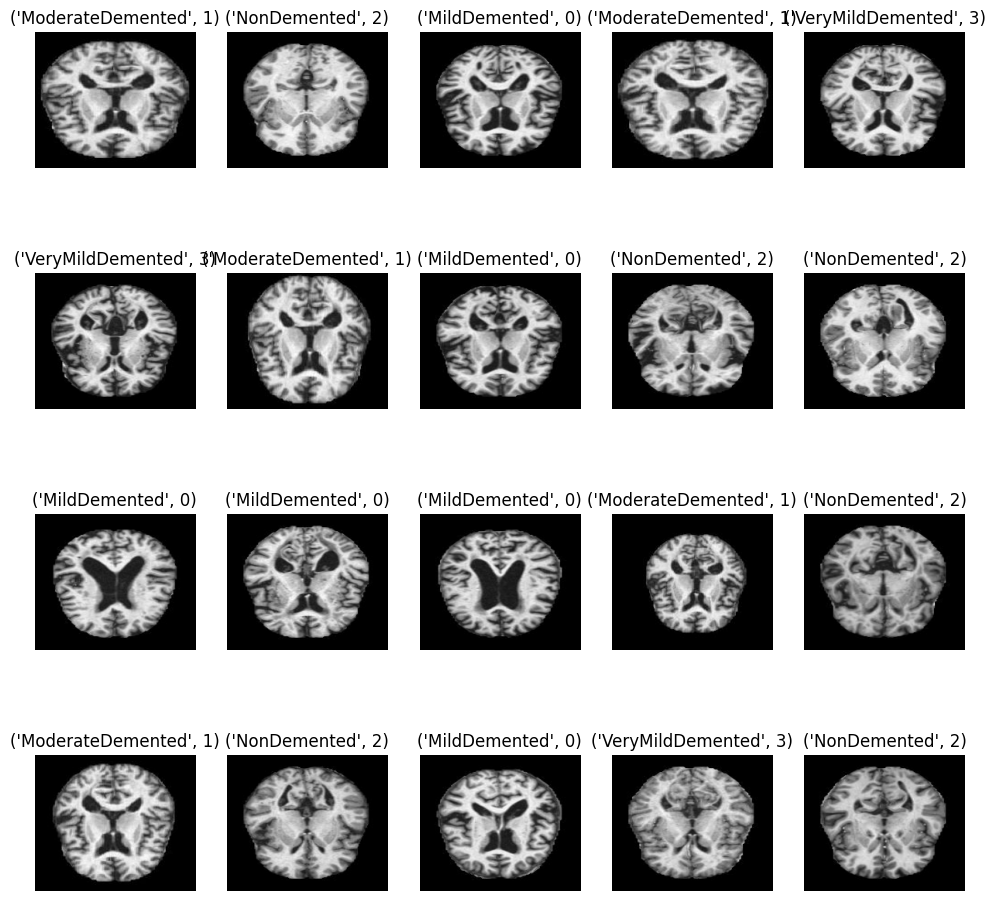

In [17]:
plt.figure(figsize=(12,12))
for image,labels in dataset.take(1):
    print(image.shape,labels)
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(f'{class_names[labels[i]],labels[i].numpy()}')
plt.savefig("dataset_images.png")

In [18]:
def normalize_images_for_dataset(image,label):
    # image=tf.image.resize(image, [256,256]) 
    return tf.cast(image/ 255., tf.float32), label

In [19]:
dataset=dataset.map(normalize_images_for_dataset)

In [26]:
for i,j in dataset.take(10):
    print((i[0].numpy().max()))

0.9911696
0.9682161
0.9886745
0.97364575
0.9859317
0.982065
0.9345399
1.0
0.98442316
0.9932264


In [29]:
test_dataset=keras.preprocessing.image_dataset_from_directory(
        'test_small',
        batch_size=32,
        image_size=(176, 208),
        shuffle=True,
)

Found 155 files belonging to 4 classes.


In [30]:
test_dataset.class_names

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [31]:
test_dataset=test_dataset.map(normalize_images_for_dataset)

In [32]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 176, 208, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [54]:
model=keras.Sequential()

In [55]:
model.add(keras.layers.Resizing(176,208))
model.add(keras.layers.Conv2D(60,(3,3),activation='relu',input_shape=(32,176,208,3)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(45,(3,3),activation='relu'))

In [56]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(32,256,256,3))

In [41]:
# model.add(keras.layers.Conv2D(60,(3,3),input_shape=(176,208,3),activation='relu'))
# model.add(keras.layers.MaxPool2D())
# model.add(keras.layers.Conv2D(45,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D())
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(64,activation='relu'))
# model.add(keras.layers.Dense(32,activation='relu'))
# model.add(keras.layers.Dense(4,activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# # model1.build(input_shape=(32,256,256,3))

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (32, 176, 208, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 174, 206, 60)        1680      
                                                                 
 max_pooling2d_10 (MaxPooli  (32, 87, 103, 60)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 85, 101, 45)         24345     
                                                                 
 flatten_3 (Flatten)         (32, 386325)              0         
                                                                 
 dense_8 (Dense)             (32, 32)                  12362432  
                                                      

In [58]:
history=model.fit(dataset,validation_data=test_dataset,epochs=20,batch_size=32)

Epoch 1/20
95/95 [==============================] - 202s 2s/step - loss: 1.0195 - accuracy: 0.6468 - val_loss: 2.6185 - val_accuracy: 0.2581
Epoch 2/20
 2/95 [..............................] - ETA: 3:22 - loss: 0.7033 - accuracy: 0.6094

KeyboardInterrupt: 

In [8]:
x=[]
y=[]

In [9]:
for label in os.listdir(train_dir):
    print(f"\t\t{label}")
    index=labels.index(label)
    for img in tqdm.tqdm(os.listdir(os.path.join(train_dir,label))):
        path=os.path.join(train_dir,label,img)
        x.append(    cv.resize(   cv.imread(path),(128,128) ) /255          )
        y.append(index)

		MildDemented


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 717/717 [00:18<00:00, 38.93it/s]


		ModerateDemented


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 60.97it/s]


		NonDemented


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 770/770 [00:19<00:00, 39.71it/s]


		VeryMildDemented


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 770/770 [00:33<00:00, 22.85it/s]


In [9]:
del x
del y

In [10]:
x=np.array(x)
y=np.array(y)

In [15]:
from random import *

Text(0.5, 1.0, 'NonDemented')

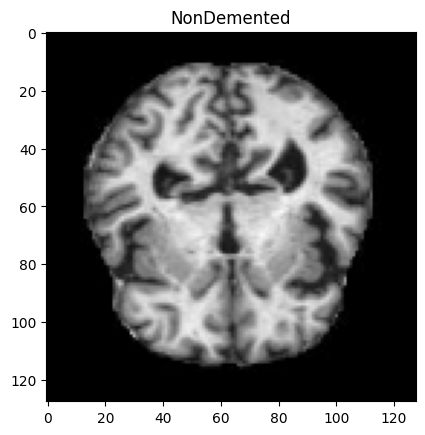

In [19]:
num=randint(0,1500)
plt.imshow(x[num])
plt.title(labels[y[num]])

In [21]:
x.shape

(2309, 128, 128, 3)

In [22]:
X=x.reshape(2309,128*128*3)

In [23]:
X.shape

(2309, 49152)

In [24]:
y.shape

(2309,)

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote=SMOTE()

In [27]:
x_smote,y_smote=smote.fit_resample(X,y)

In [28]:
xsmote_img=x_smote.reshape(-1,128,128,3)

In [30]:
y_smote.shape,xsmote_img.shape

((3080,), (3080, 128, 128, 3))

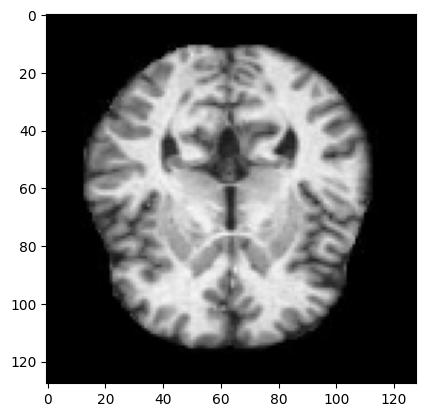

In [40]:
num=randint(0,3080)
plt.imshow(xsmote_img[num])

In [41]:
del x
del y

In [67]:
model=keras.Sequential()

In [68]:

model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test =train_test_split(xsmote_img,y_smote,test_size=0.10)

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 174, 206, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 87, 103, 64)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 101, 32)       18464     
                                                                 
 batch_normalization (Batch  (None, 85, 101, 32)       128       
 Normalization)                                                  
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 50, 32)        0         
 g2D)                                                            
                                                        

In [69]:
X_train.shape,X_test.shape

((2772, 128, 128, 3), (308, 128, 128, 3))

In [70]:
history=model.fit(
    X_train,y_train,validation_data=(test_x,test_y),epochs=5
)

Epoch 1/5
87/87 [==============================] - 106s 1s/step - loss: 1.1384 - accuracy: 0.6259 - val_loss: 1.4246 - val_accuracy: 0.2129
Epoch 2/5
87/87 [==============================] - 80s 917ms/step - loss: 0.3780 - accuracy: 0.8557 - val_loss: 1.4785 - val_accuracy: 0.2323
Epoch 3/5
87/87 [==============================] - 90s 1s/step - loss: 0.1852 - accuracy: 0.9358 - val_loss: 1.6481 - val_accuracy: 0.3613
Epoch 4/5
87/87 [==============================] - 117s 1s/step - loss: 0.1048 - accuracy: 0.9693 - val_loss: 2.0453 - val_accuracy: 0.4323
Epoch 5/5
87/87 [==============================] - 105s 1s/step - loss: 0.0652 - accuracy: 0.9827 - val_loss: 4.1581 - val_accuracy: 0.2387


In [72]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 2s 202ms/step - loss: 0.2474 - accuracy: 0.9253


[0.24736180901527405, 0.9253246784210205]

In [55]:
model.save("model.keras")

In [56]:
test_dir='test_small'

In [57]:
test_x=[]
test_y=[]

In [58]:
for label in os.listdir(test_dir):
    print(f"\t\t\t{label}")
    index=labels.index(label)
    for img in tqdm.tqdm(os.listdir(os.path.join(test_dir,label))):
        path=os.path.join(test_dir,label,img)
        test_x.append(
            cv.resize(
                cv.imread(path),(128,128)
            )/255
        )
        test_y.append(index)

			MildDemented


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 19.75it/s]


			ModerateDemented


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 29.19it/s]


			NonDemented


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:01<00:00, 38.80it/s]


			VeryMildDemented


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:01<00:00, 45.17it/s]


In [60]:
test_x=np.array(test_x)
test_y=np.array(test_y)

In [62]:
model.evaluate(test_x,test_y)

5/5 [==============================] - 1s 196ms/step - loss: 8.6052 - accuracy: 0.2258


[8.605245590209961, 0.22580644488334656]

In [75]:
from pandas import *

In [76]:
df=DataFrame(history.history)

In [77]:
df

,loss,accuracy,val_loss,val_accuracy
0,1.138428,0.625902,1.424565,0.212903
1,0.377998,0.855700,1.478543,0.232258
2,0.185239,0.935786,1.648075,0.361290
3,0.104781,0.969336,2.045296,0.432258
4,0.065202,0.982684,4.158100,0.238710


<Axes: >

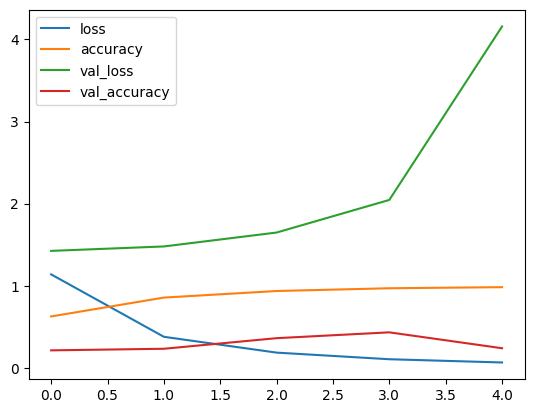

In [78]:
df.plot()

In [90]:
img=cv.imread(os.path.join("D:\\Vivek\\Miscellaneous\\Alzheimer_prediction\\test_small\\MildDemented","26 (19).jpg"))

In [92]:
img=cv.resize(img,(128,128))/255

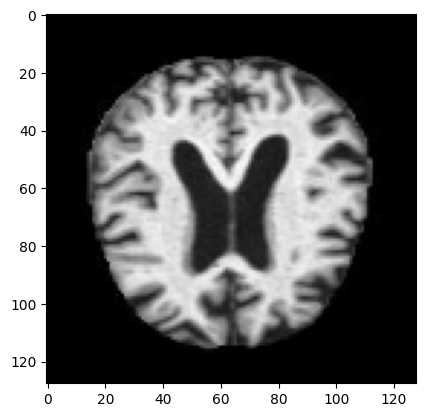

In [93]:
plt.imshow(img)

In [96]:
labels[np.argmax(model.predict(np.expand_dims(img,0)))]

1/1 [==============================] - 0s 34ms/step


'MildDemented'

In [6]:
def predict_img(path):
    img=cv.imread(path)
    img=cv.resize(img,(128,128))/255
    return labels[np.argmax(model.predict(np.expand_dims(img,0)))]

In [98]:
path='D:\\Vivek\\Miscellaneous\\Alzheimer_prediction\\test_small\\VeryMildDemented\\26 (63).jpg'

In [99]:
predict_img(path)

1/1 [==============================] - 0s 40ms/step


'MildDemented'

In [4]:
model=keras.models.load_model("model.keras")

In [12]:
predict_img('test1.jpg')

1/1 [==============================] - 0s 50ms/step


'MildDemented'